In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Aviation_Data - Copy.csv', low_memory=False)

# Pilot in Report Status

In [3]:
pilot = {'pilot' : 0}

for status in df['Report.Status']:
    if 'pilot' in str(status):
        pilot['pilot'] += 1
        
pilot

{'pilot': 13420}

In [5]:
df['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

# Subsetting Years

### Note: Added Year column and Five_Year columns. Dropped Nan values in event date.

In [6]:
dfyears = df.copy()

In [8]:
dfyears.dropna(subset=['Event.Date'],inplace=True)

In [12]:
dfyears['Year'] = dfyears['Event.Date'].astype(str).str[:4]

In [13]:
bins = [1940,1982, 1987, 1992, 1997, 2002, 2007, 2012, 2017, 2022]
labels = ['1942-1981','1982-1986', '1987-1991', '1992-1996', '1997-2001', '2002-2006', '2007-2011', '2012-2016', '2017-2021']
dfyears['Five_Year'] = pd.cut(dfyears['Year'].astype(int), bins=bins, labels=labels, right=False)

In [14]:
fiveyrcnt = dfyears['Five_Year'].value_counts().sort_index()

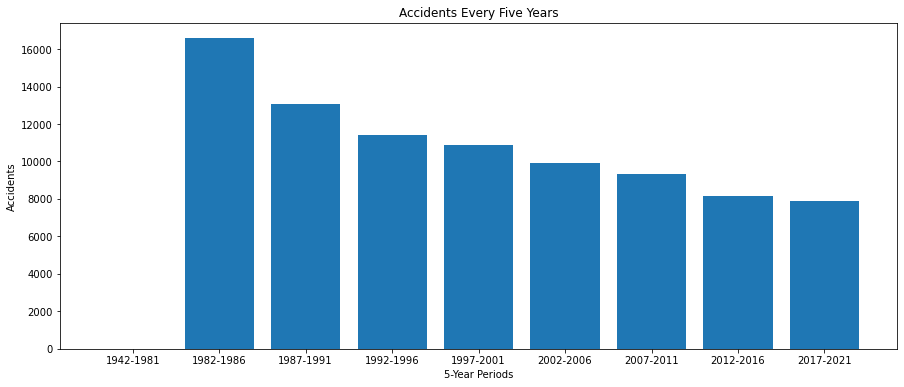

In [15]:
plt.figure(figsize = (15,6))
plt.bar(fiveyrcnt.keys(), fiveyrcnt.values)
plt.title('Accidents Every Five Years')
plt.ylabel('Accidents')
plt.xlabel('5-Year Periods');

# Investigating Duplicates

### Note: When investigating duplicates, we found that duplicate accident IDs seemed to have only records that were exactly the same.  Duplicate event IDs sometimes had minor differences even though they referred to the same event.  We decided to eliminate all duplicates based on event IDs to clean the data despite the discrepancies.

In [17]:
df_dup = df.copy()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [37]:
df_dup.loc[df_dup['Accident.Number'] == "DCA22WA130"]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
89299,20220614105258,Incident,DCA22WA130,2022-06-05,"Peshawar, OF",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
89300,20220614105258,Incident,DCA22WA130,2022-06-05,"Peshawar, OF",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [39]:
df_dup['Event.Id'].value_counts().head(30)

20001214X45071    3
20001212X19172    3
20001214X40512    2
20050831X01347    2
20001211X11585    2
20221121106336    2
20001208X07896    2
20001213X33340    2
20001213X29170    2
20020917X02173    2
20001213X33516    2
20001208X05417    2
20001213X24919    2
20001214X42919    2
20001214X36453    2
20001213X34415    2
20001212X19017    2
20220111104514    2
20001213X33697    2
20001208X06211    2
20001212X22215    2
20050624X00863    2
20001206X01031    2
20011219X02420    2
20001213X32787    2
20001211X14014    2
20001208X08011    2
20020917X03351    2
20001214X45149    2
20001214X44190    2
Name: Event.Id, dtype: int64

In [40]:
df_dup.loc[df_dup['Event.Id'] == "20001214X45071"]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
6781,20001214X45071,Accident,FTW84LA056C,1983-11-11,"HOUSTON, TX",United States,NaN,NaN,AAP,ANDRAU,...,Business,NaN,0.0,0.0,0.0,5.0,VMC,Standing,Probable Cause,19-03-2002
6784,20001214X45071,Accident,FTW84LA056B,1983-11-11,"HOUSTON, TX",United States,NaN,NaN,AAP,ANDRAU,...,Personal,NaN,0.0,0.0,0.0,5.0,VMC,Standing,Probable Cause,19-03-2002
6785,20001214X45071,Accident,FTW84LA056A,1983-11-11,"HOUSTON, TX",United States,NaN,NaN,AAP,ANDRAU,...,Personal,NaN,0.0,0.0,0.0,5.0,VMC,Taxi,Probable Cause,19-03-2002


In [41]:
df_dup = df_dup.drop_duplicates(subset='Event.Id')

# Analyzing Clean Data Based on Years

### Notes: Every single broad phase of flight value is null for the past 5 years...

In [45]:
dfyrscln = dfyears.copy()

In [46]:
dfyrscln = dfyrscln.drop_duplicates(subset='Event.Id')

In [47]:
dfyrscln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87951 entries, 0 to 90347
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Event.Id                87951 non-null  object  
 1   Investigation.Type      87951 non-null  object  
 2   Accident.Number         87951 non-null  object  
 3   Event.Date              87951 non-null  object  
 4   Location                87899 non-null  object  
 5   Country                 87729 non-null  object  
 6   Latitude                34212 non-null  object  
 7   Longitude               34203 non-null  object  
 8   Airport.Code            49601 non-null  object  
 9   Airport.Name            52117 non-null  object  
 10  Injury.Severity         86961 non-null  object  
 11  Aircraft.damage         84848 non-null  object  
 12  Aircraft.Category       32181 non-null  object  
 13  Registration.Number     86666 non-null  object  
 14  Make                  

In [49]:
eightytwo = dfyrscln.loc[dfyrscln['Five_Year'] == '1982-1986']

In [60]:
print(eightytwo['Event.Id'].count())
print(eightytwo['Total.Fatal.Injuries'].sum())
print(eightytwo['Total.Serious.Injuries'].sum())
print(eightytwo['Total.Minor.Injuries'].sum())
print(eightytwo['Total.Uninjured'].sum())

16351
6608.0
3270.0
5089.0
54590.0


In [57]:
seventeen = dfyrscln.loc[dfyrscln['Five_Year'] == '2017-2021']

In [61]:
print(seventeen['Event.Id'].count())
print(seventeen['Total.Fatal.Injuries'].sum())
print(seventeen['Total.Serious.Injuries'].sum())
print(seventeen['Total.Minor.Injuries'].sum())
print(seventeen['Total.Uninjured'].sum())

7880
4003.0
2245.0
1463.0
43452.0


In [ ]:
# saved for posterity

# categories = ['Total Accidents', 'Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']
# values1 = [16351, 6608, 3270, 5089, 54590]
# values2 = [7880, 4003, 2245, 1463, 43452]


In [82]:
categories = ['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries']
values1 = [6608, 3270, 5089]
values2 = [4003, 2245, 1463]

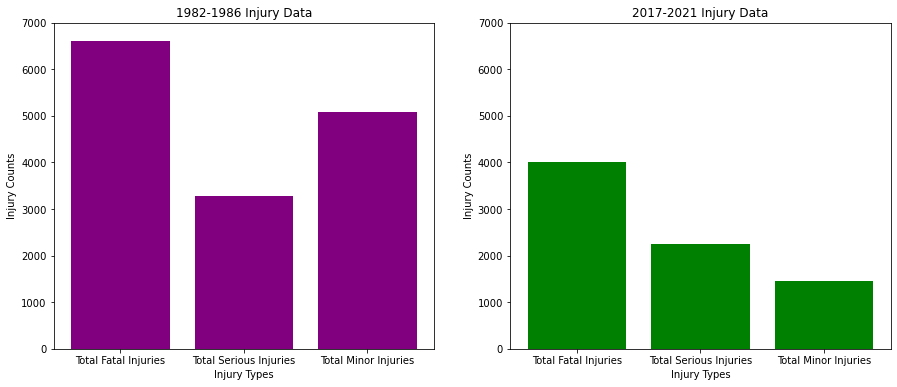

In [86]:
fig, ax = plt.subplots(1, 2, figsize = (15,6))

ax[0].bar(categories, values1, color="purple", label="1982-1986")
ax[0].set_ylim(0,7000)
ax[0].set_xlabel('Injury Types')
ax[0].set_ylabel('Injury Counts')
ax[0].set_title("1982-1986 Injury Data")

ax[1].bar(categories, values2, color="green", label="2017-2021")
ax[1].set_ylim(0,7000)
ax[1].set_xlabel('Injury Types')
ax[1].set_ylabel('Injury Counts')
ax[1].set_title("2017-2021 Injury Data");

In [92]:
damage17 = seventeen['Aircraft.damage'].value_counts()

In [93]:
damage82 = eightytwo['Aircraft.damage'].value_counts()

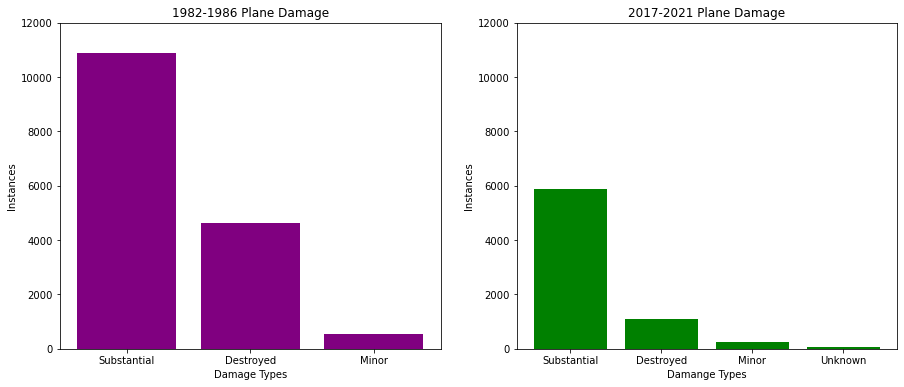

In [101]:
fig, ax = plt.subplots(1, 2, figsize = (15,6))

ax[0].bar(damage82.keys(), damage82.values, color="purple", label="1982-1986")
ax[0].set_ylim(0,12000)
ax[0].set_xlabel('Damage Types')
ax[0].set_ylabel('Instances')
ax[0].set_title("1982-1986 Plane Damage")

ax[1].bar(damage17.keys(), damage17.values, color="green", label="2017-2021")
ax[1].set_ylim(0,12000)
ax[1].set_xlabel('Damange Types')
ax[1].set_ylabel('Instances')
ax[1].set_title("2017-2021 Plane Damage");

In [104]:
enginenum = seventeen['Number.of.Engines'].value_counts().sort_index(ascending=True)

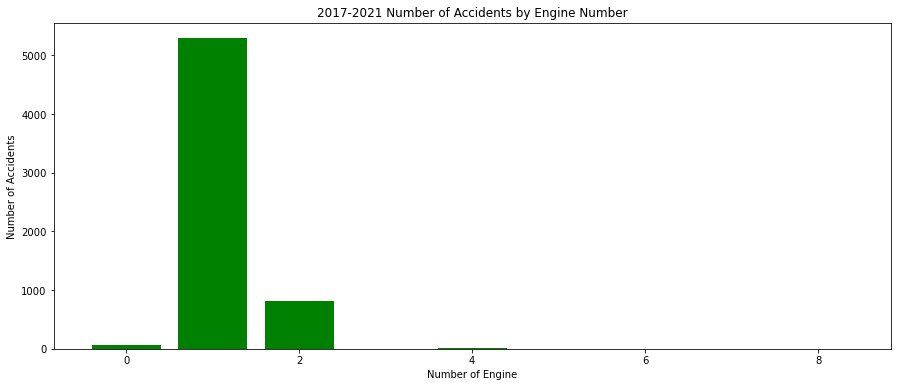

In [110]:
plt.figure(figsize = (15,6))
plt.bar(enginenum.keys(), enginenum.values, color="green")
plt.xlabel('Number of Engine')
plt.ylabel('Number of Accidents')
plt.title("2017-2021 Number of Accidents by Engine Number");

In [109]:
enginetype = seventeen['Engine.Type'].value_counts().sort_index(ascending=True)

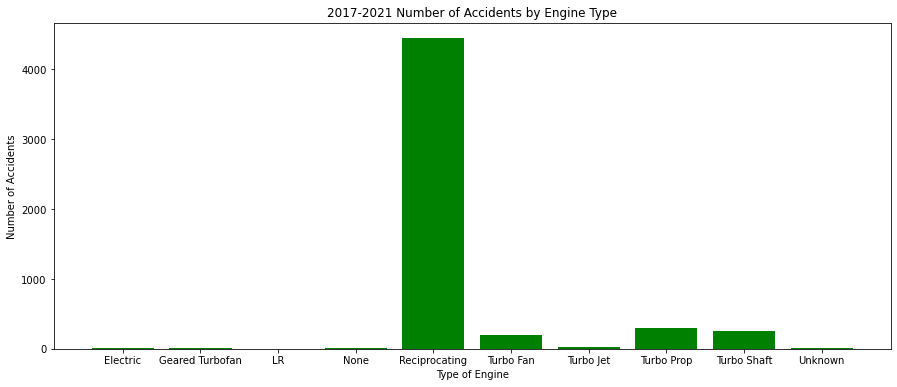

In [111]:
plt.figure(figsize = (15,6))
plt.bar(enginetype.keys(), enginetype.values, color="green")
plt.xlabel('Type of Engine')
plt.ylabel('Number of Accidents')
plt.title("2017-2021 Number of Accidents by Engine Type");

In [120]:
purpose = seventeen['Purpose.of.flight'].value_counts().head(7)

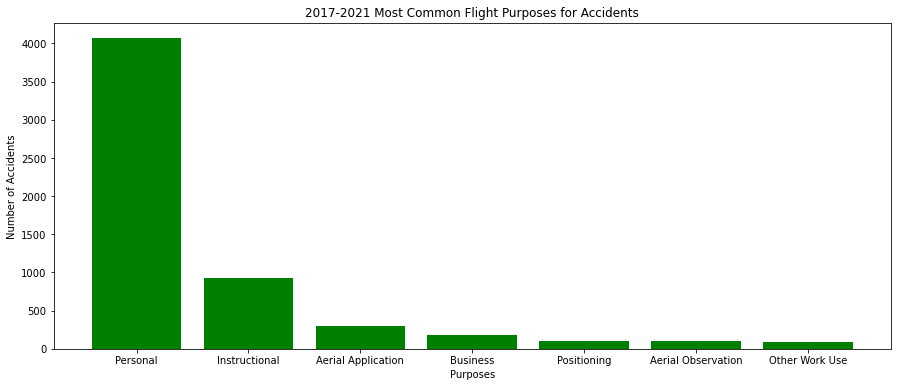

In [122]:
plt.figure(figsize = (15,6))
plt.bar(purpose.keys(), purpose.values, color="green")
plt.xlabel('Purposes')
plt.ylabel('Number of Accidents')
plt.title("2017-2021 Most Common Flight Purposes for Accidents");

In [133]:
make = seventeen['Make'].value_counts().head(10)

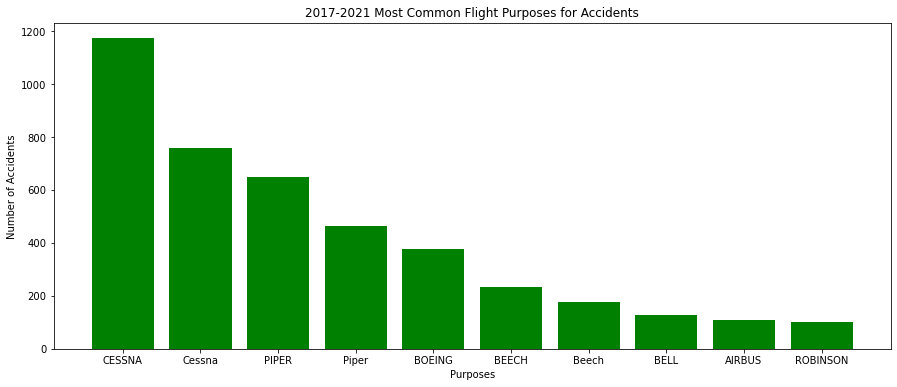

In [134]:
plt.figure(figsize = (15,6))
plt.bar(make.keys(), make.values, color="green")
plt.xlabel('Purposes')
plt.ylabel('Number of Accidents')
plt.title("2017-2021 Most Common Flight Purposes for Accidents");

In [135]:
aircat = seventeen['Aircraft.Category'].value_counts()

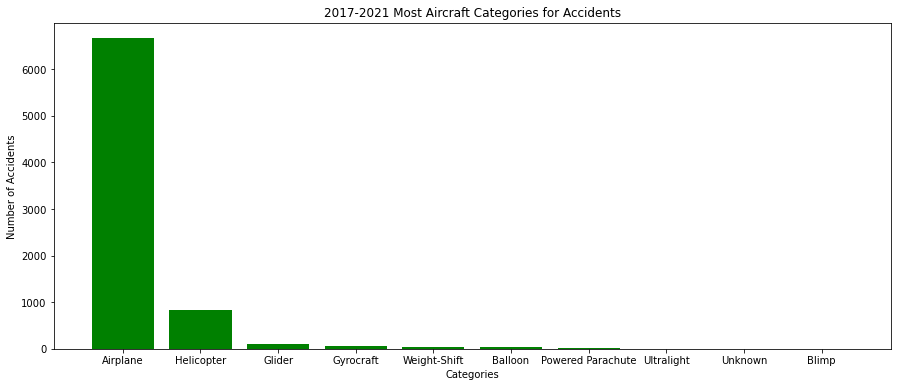

In [136]:
plt.figure(figsize = (15,6))
plt.bar(aircat.keys(), aircat.values, color="green")
plt.xlabel('Categories')
plt.ylabel('Number of Accidents')
plt.title("2017-2021 Most Aircraft Categories for Accidents");

ANCHORAGE, AK           434
MIAMI, FL               200
ALBUQUERQUE, NM         196
HOUSTON, TX             193
CHICAGO, IL             184
                       ... 
Herlong, FL               1
Lubeck, Germany           1
GROTON, NY                1
Gatesville, TX            1
Zell am See, Austria      1
Name: Location, Length: 27758, dtype: int64

In [141]:
seventeen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7880 entries, 79915 to 88540
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Event.Id                7880 non-null   object  
 1   Investigation.Type      7880 non-null   object  
 2   Accident.Number         7880 non-null   object  
 3   Event.Date              7880 non-null   object  
 4   Location                7880 non-null   object  
 5   Country                 7880 non-null   object  
 6   Latitude                6831 non-null   object  
 7   Longitude               6831 non-null   object  
 8   Airport.Code            4620 non-null   object  
 9   Airport.Name            4492 non-null   object  
 10  Injury.Severity         7438 non-null   object  
 11  Aircraft.damage         7284 non-null   object  
 12  Aircraft.Category       7791 non-null   object  
 13  Registration.Number     7878 non-null   object  
 14  Make               

In [150]:
seventeen['State'] = seventeen['Location'].astype(str).str[-2:]

<ipython-input-150-abe7830ebe9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seventeen['State'] = seventeen['Location'].astype(str).str[-2:]


In [152]:
seventeen['State'].value_counts().head(12)

CA    585
TX    532
FL    513
AK    425
ia    291
AZ    234
WA    191
CO    191
GA    183
OR    159
NC    158
ID    155
Name: State, dtype: int64

In [153]:
amateur = seventeen['Amateur.Built'].value_counts()

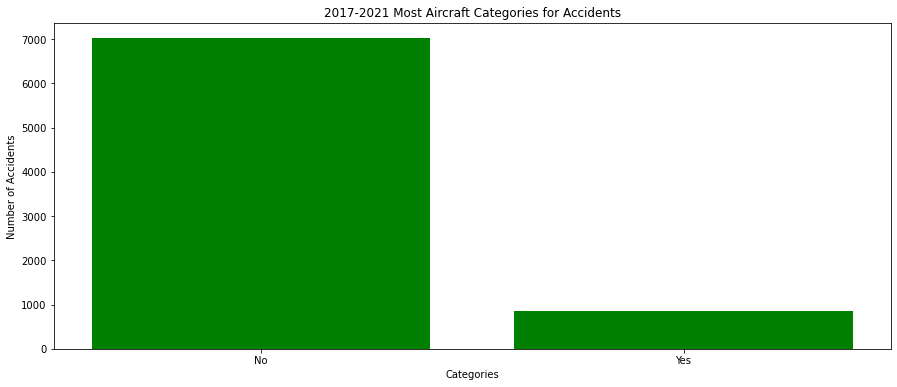

In [154]:
plt.figure(figsize = (15,6))
plt.bar(amateur.keys(), amateur.values, color="green")
plt.xlabel('Categories')
plt.ylabel('Number of Accidents')
plt.title("2017-2021 Most Aircraft Categories for Accidents");

In [ ]:
seventeen['Air.']